In [ ]:

import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Ghanashyam&7500',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'E:\Portfolio Project Data Analyst\E-Commerce (Target) Sales Data'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector


db = mysql.connector.connect(host = 'localhost', 
                             username = 'root',
                             password = 'Ghanashyam&7500',
                             database = 'ecommerce')

cur = db.cursor()

# List all unique cities where customers are located.


In [3]:
query = "select distinct customer_city from customers"

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# Count the number of orders placed in 2017.

In [4]:
query = """select count(order_id) from orders where year(order_purchase_timestamp) = 2017"""

cur.execute(query)

data = cur.fetchall()

"total order placed in 2017 are",data[0][0]

('total order placed in 2017 are', 135303)

# Find the total sales per category.

In [5]:
query = """select products.product_category category,  
round(sum(payments.payment_value),2) sales 
from products join order_items 
on products.product_id = order_items.product_id 
join payments on payments.order_id = order_items.order_id group by category 
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["category" ,"sales"])
df

,category,sales
0,perfumery,13681943.82
1,Furniture Decoration,38614762.58
2,telephony,13145815.37
3,Fashion Bags and Accessories,5890273.56
4,bed table bath,46238949.12
...,...,...
69,cds music dvds,32384.61
70,La Cuisine,78665.31
71,Fashion Children's Clothing,21213.09
72,PC Gamer,58709.61


# Calculate the percentage of orders that were paid in installments.


In [6]:
query = """select (sum(case when payment_installments >1 then 1 else 0 end)/ count(*))*100 from payments
"""

cur.execute(query)

data = cur.fetchall()

data

[(Decimal('49.4176'),)]

# Count the number of customers from each state.

<function matplotlib.pyplot.show(close=None, block=None)>

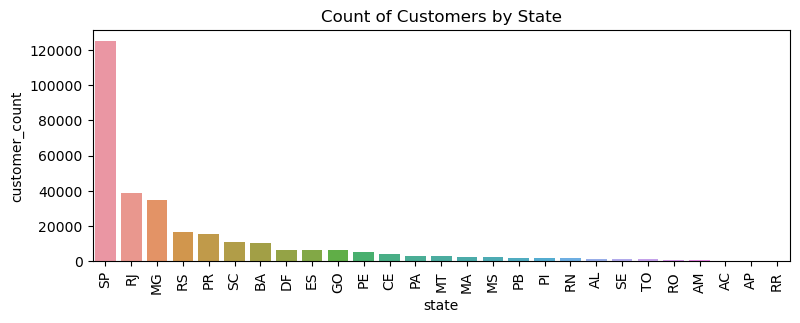

In [9]:
query = """select customer_state,  count(customer_id)
from customers group by customer_state
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["state", "customer_count"])
df = df.sort_values(by = "customer_count", ascending = False)

plt.figure(figsize = (9,3))
sns.barplot(x = df["state"], y = df["customer_count"])
plt.title("Count of Customers by State")
plt.xticks(rotation = 90)
plt.show